In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

# Cleaning the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [7]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int64')

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
df['Marital_Status'] = df['Marital_Status'].replace({0: 'Unmarried', 1: 'Married'})

In [13]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [14]:
df[['Orders' , 'Amount']].sum()

Orders        27981
Amount    106249129
dtype: int64

#### A total of 27981 Orders were placed with a total sales amount of 106.24 Million

# Performing Exploratory Data Analysis on the Data

### Which Gender is the bigger contributer to the sales?

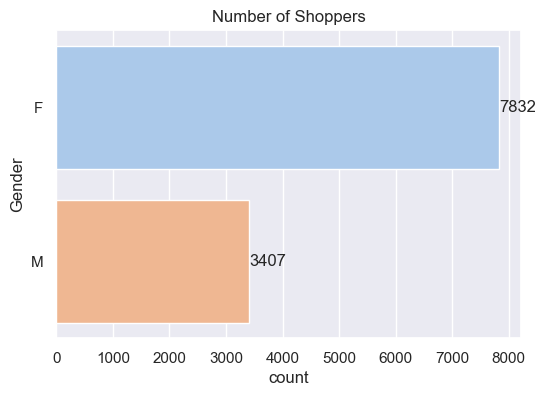

In [38]:
sns.set(rc={'figure.figsize':(6,4)})
ax = sns.countplot(y = 'Gender',data = df , palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Number of Shoppers')
plt.show()

We understand that most of the Shoppers are Females

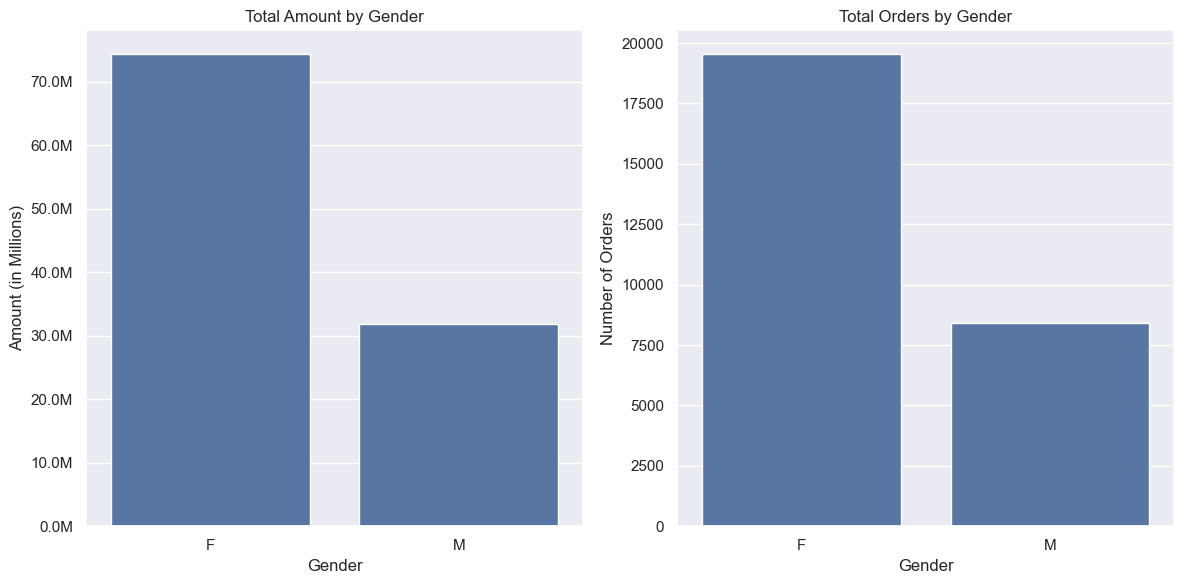

In [16]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
    
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
orders_gen = df.groupby(['Gender'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

ax1 = sns.barplot(x='Gender', y='Amount', data=sales_gen, ax=axes[0])
ax1.yaxis.set_major_formatter(FuncFormatter(millions))
ax1.set_title('Total Amount by Gender')
ax1.set_ylabel('Amount (in Millions)')
ax1.set_xlabel('Gender')

ax2 = sns.barplot(x='Gender', y='Orders', data=orders_gen, ax=axes[1])
ax2.set_title('Total Orders by Gender')
ax2.set_ylabel('Number of Orders')
ax2.set_xlabel('Gender')

plt.tight_layout()
plt.show()

*From above graphs we can see that most of the orders are placed by Females and even the purchasing power of Females is greater than males*

### What is the amount spent by the different Age groups and what Gender forms the Majority of the sales in that Age group?

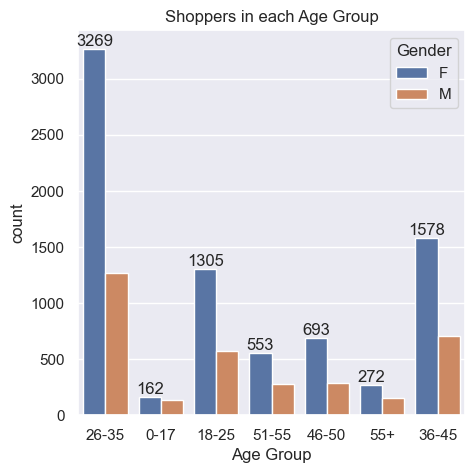

In [17]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
ax.bar_label(ax.containers[0])
ax.set_title('Shoppers in each Age Group')
plt.show()

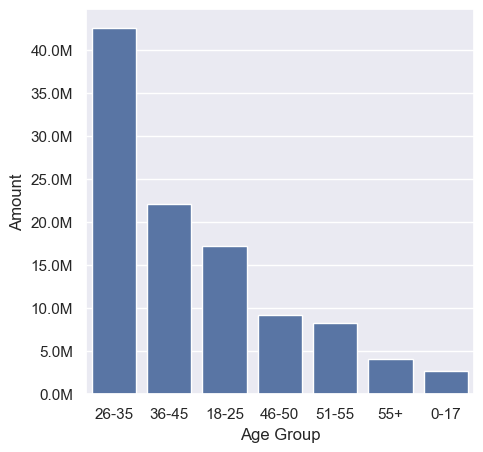

In [18]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax = sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
ax.yaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

*From above graphs we can see that the most orders are placed/amount spent is by people of age group 26-35 , of which majority are Females*

### Which states are the major contributer to the sales?

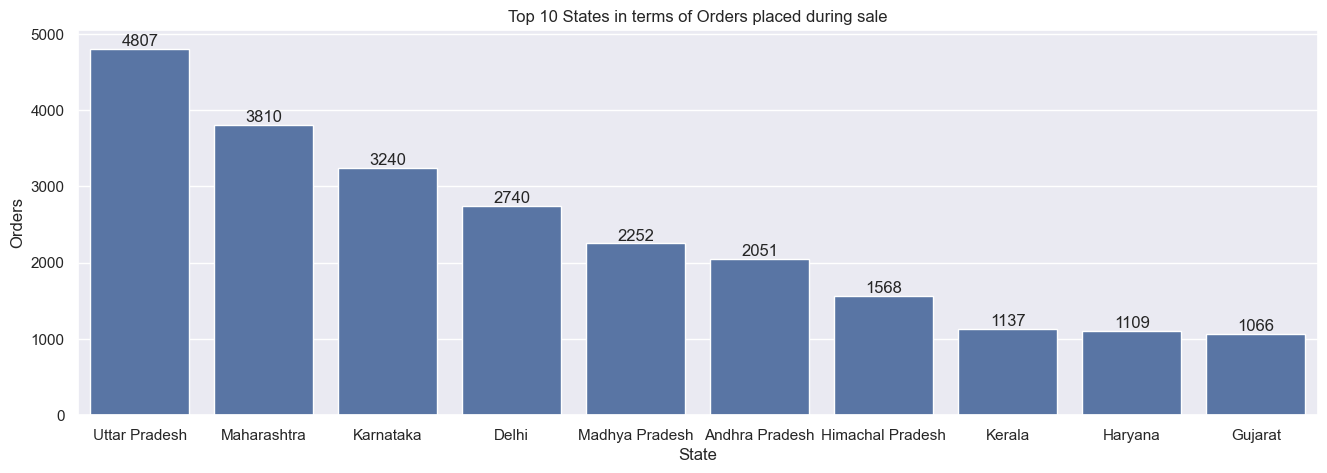

In [19]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
ax = sns.barplot(data = sales_state, x = 'State', y = 'Orders')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title('Top 10 States in terms of Orders placed during sale')
plt.show()

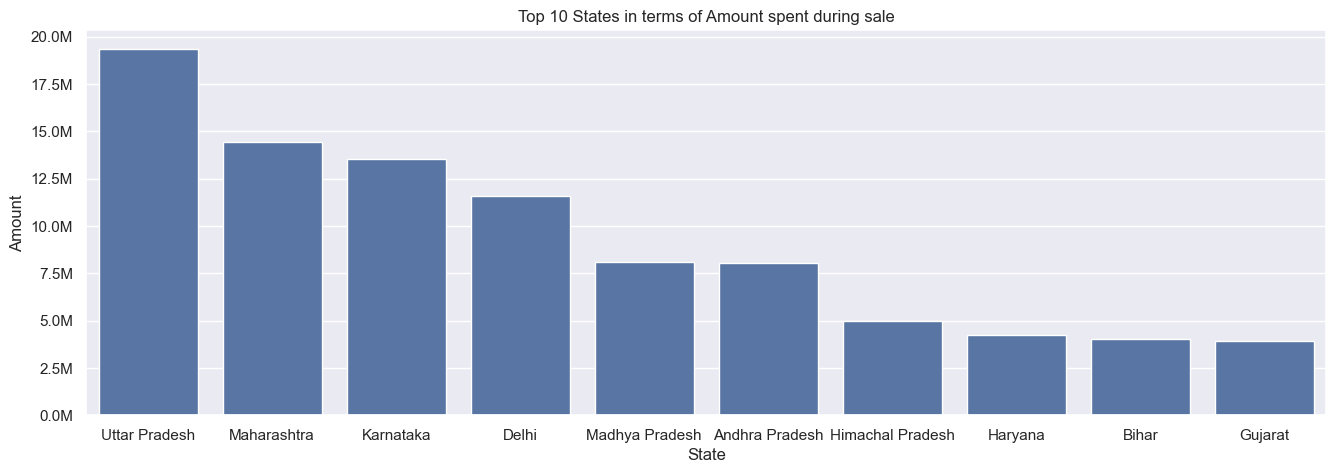

In [20]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
ax = sns.barplot(data = sales_state, x = 'State',y= 'Amount')
ax.set_title('Top 10 States in terms of Amount spent during sale')
ax.yaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

*From above graphs we can see that most of the orders & total sales/amount are generated from Uttar Pradesh, Maharashtra and Karnataka. Collectively these 3 states contribute over 50% of the total sales generated.*


### Does marital status play a role in the orders placed/revenue generated?

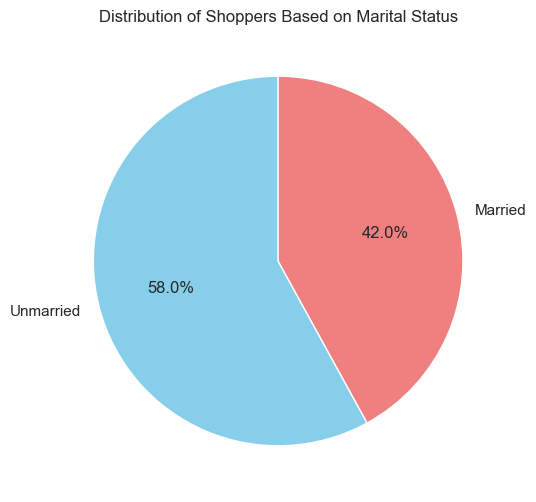

In [40]:
marital_counts = df['Marital_Status'].value_counts()  
plt.figure(figsize=(6, 6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Shoppers Based on Marital Status')
plt.show()

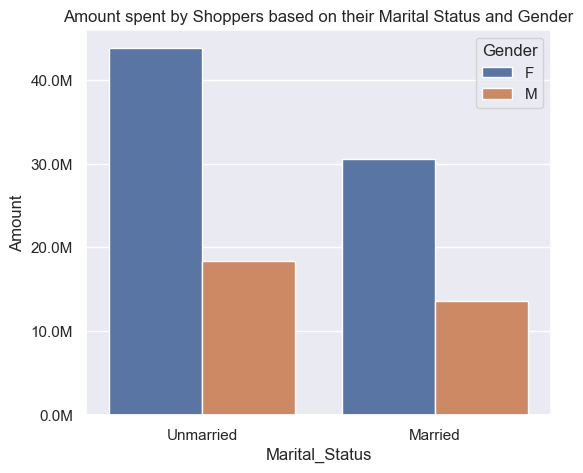

In [22]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax = sns.set(rc={'figure.figsize':(6,5)})
ax = sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
ax.yaxis.set_major_formatter(FuncFormatter(millions))
ax.set_title('Amount spent by Shoppers based on their Marital Status and Gender')
plt.show()

*From above graphs we can see that most of the buyers are unmarried (women) and they have high purchasing power*

### People working in which occupations are most likely to spend more?

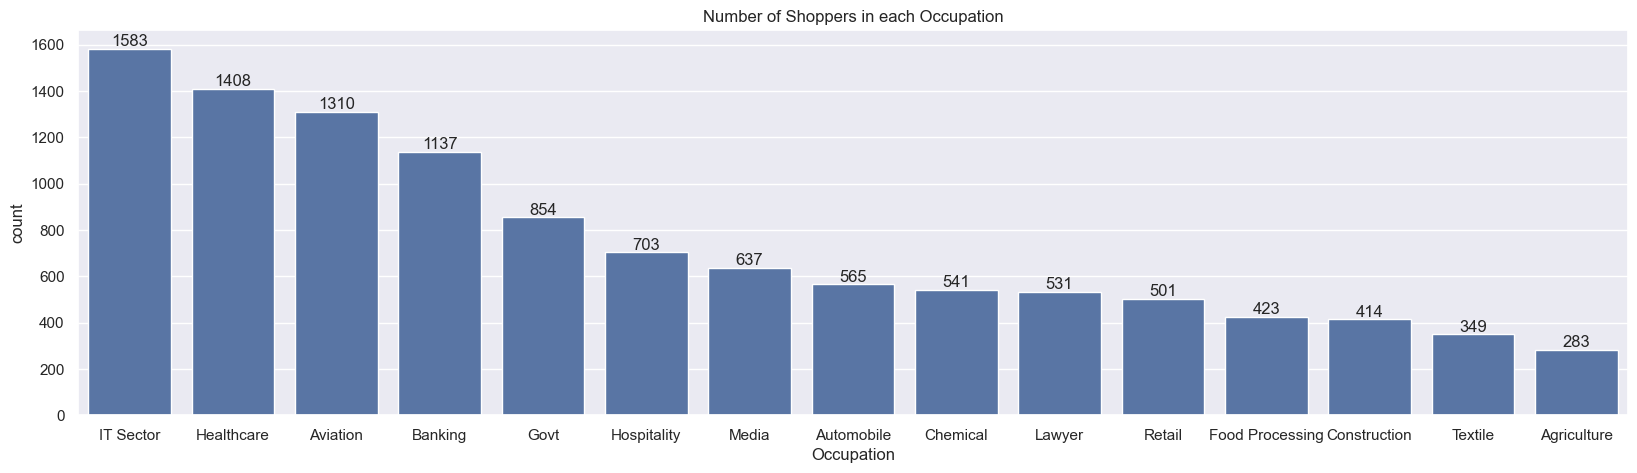

In [23]:
sns.set(rc={'figure.figsize':(20,5)})
sorted_occupation = df['Occupation'].value_counts().sort_values(ascending= False).index
ax = sns.countplot(data = df, x = 'Occupation' , order = sorted_occupation)
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title('Number of Shoppers in each Occupation')
plt.show()

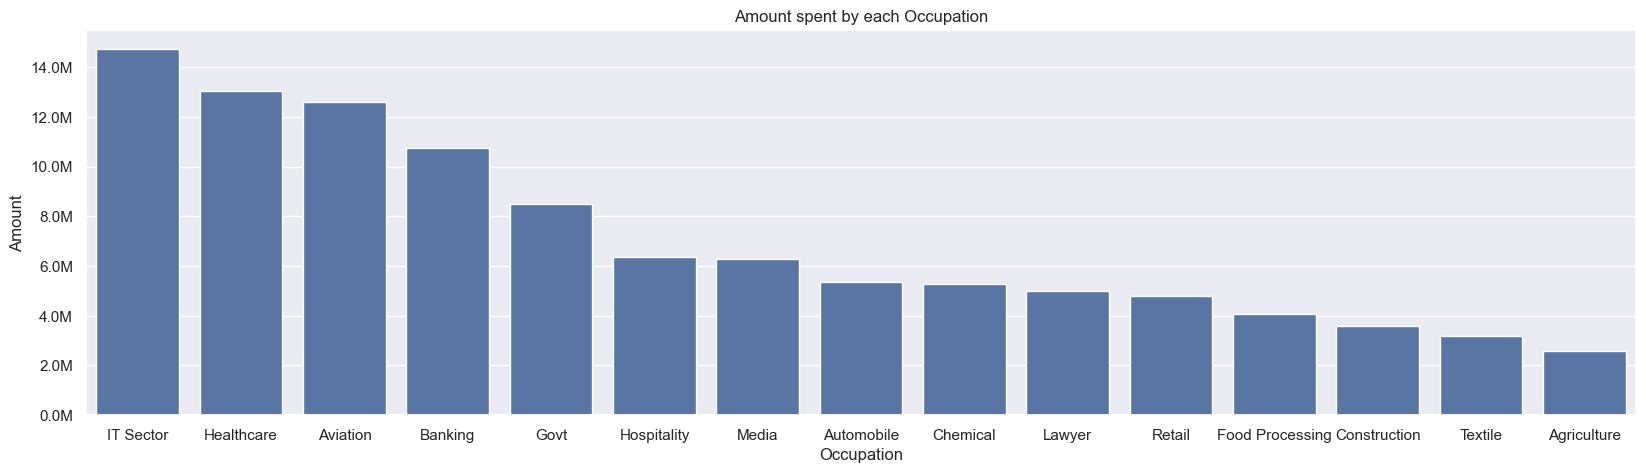

In [24]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax = sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
ax.yaxis.set_major_formatter(FuncFormatter(millions))
ax.set_title('Amount spent by each Occupation')
plt.show()

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Which Product Categories saw the most volume of orders in the sale?

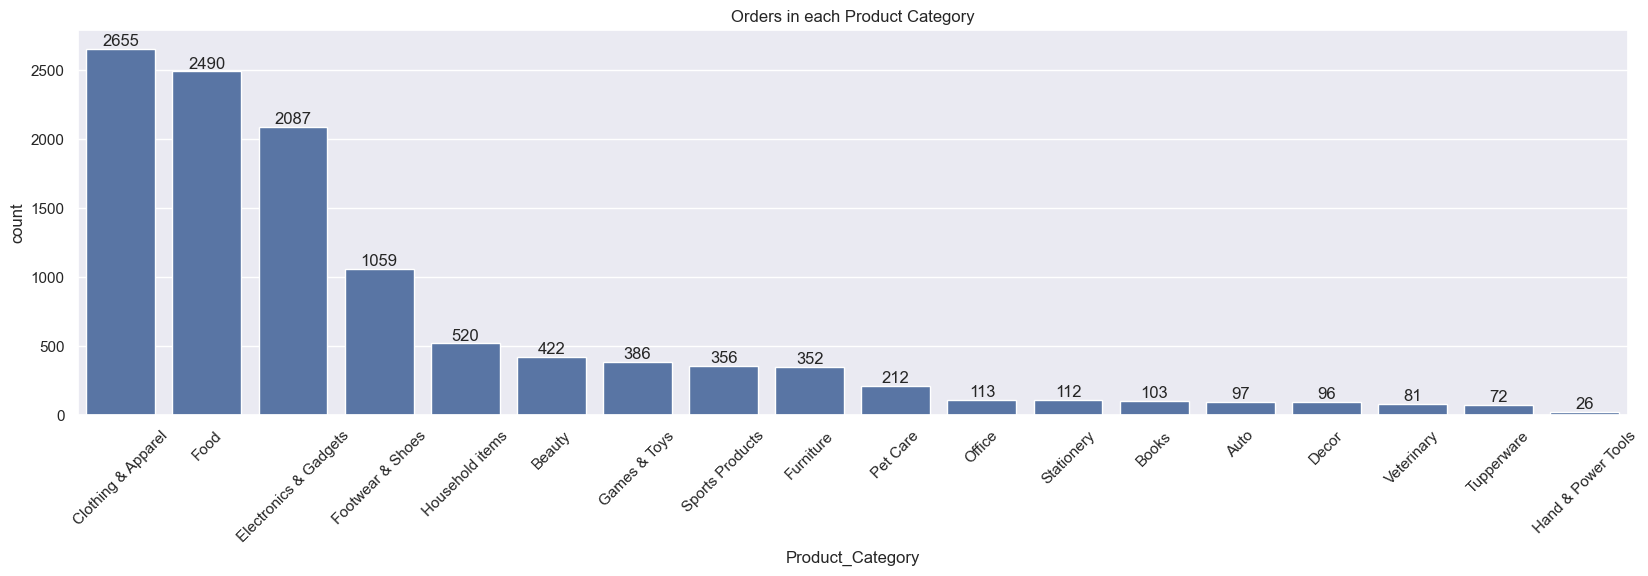

In [25]:
sns.set(rc={'figure.figsize':(20,5)})
sorted_cat = df['Product_Category'].value_counts().sort_values(ascending = False).index
ax = sns.countplot(data = df, x = 'Product_Category', order = sorted_cat)
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title('Orders in each Product Category')
plt.xticks(rotation = 45)
plt.show()

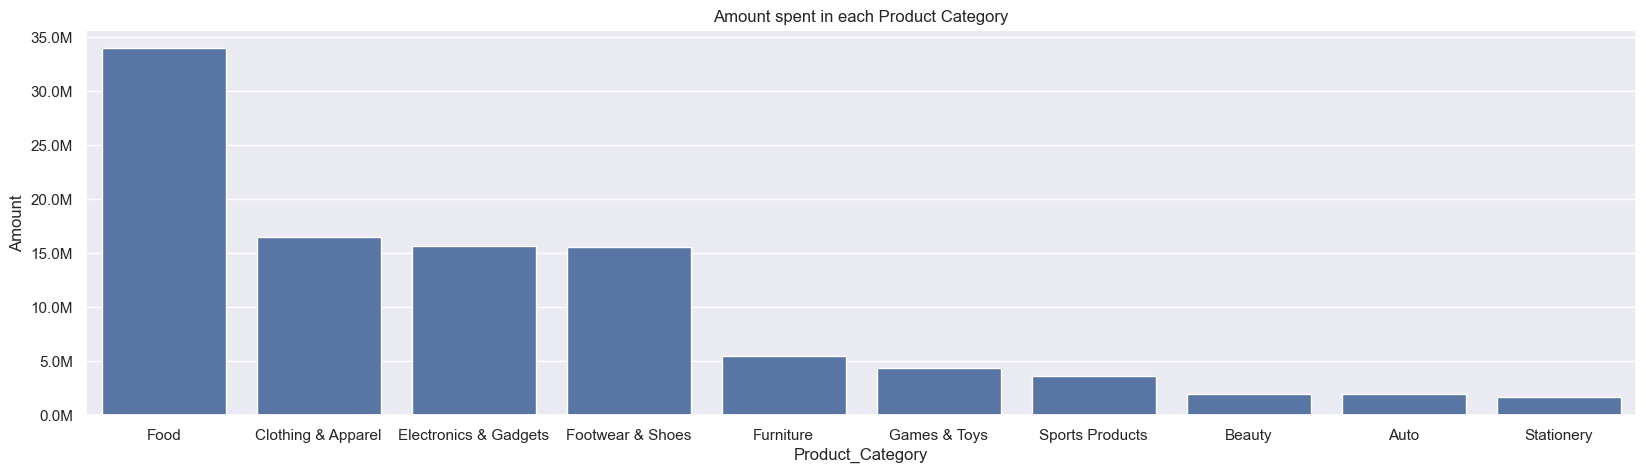

In [26]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data = sales_state, x = 'Product_Category',y = 'Amount')
ax.yaxis.set_major_formatter(FuncFormatter(millions))
ax.set_title('Amount spent in each Product Category')
plt.show()

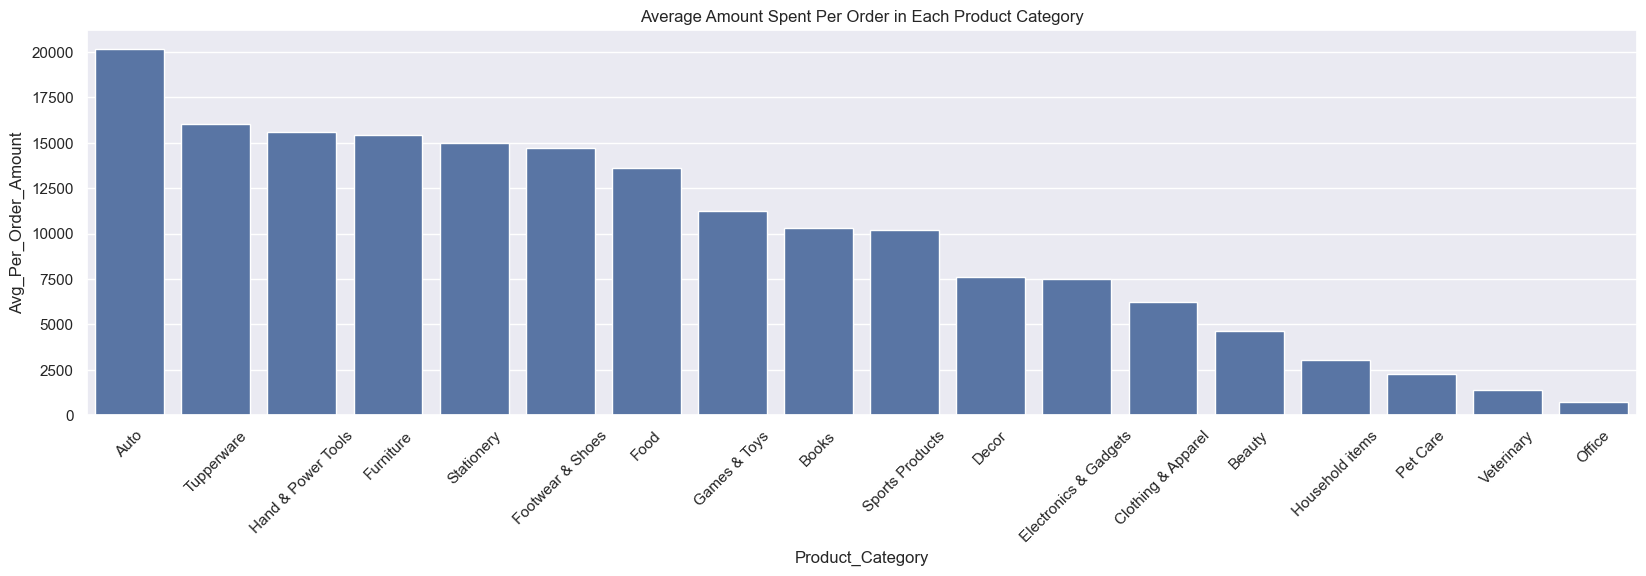

In [32]:
category_stats = df.groupby('Product_Category', as_index=False).agg({'Amount': 'sum'})  # Sum of Amount
category_stats['Order_Count'] = df['Product_Category'].value_counts().reindex(category_stats['Product_Category']).values  # Count of orders
category_stats['Avg_Per_Order_Amount'] = category_stats['Amount'] / category_stats['Order_Count']
category_stats = category_stats.sort_values(by='Avg_Per_Order_Amount', ascending=False)
sns.set(rc={'figure.figsize': (20, 5)})
ax = sns.barplot(data=category_stats, x='Product_Category', y='Avg_Per_Order_Amount', order=category_stats['Product_Category'])
ax.set_title('Average Amount Spent Per Order in Each Product Category')
plt.xticks(rotation=45)
plt.show()

*From above graphs we can see that top 3 categories for orders are Clothing & Apparel , Food , Electronics & Gadgets with most of the orders concentrated with Clothing & Apparel while the revenue for Food orders surpasses other categories by a very wide margin.*

## Conclusion:
A total of 27,981 Orders were placed during the Sale by 11,239 Shoppers. The Shoppers shopped for just over 106 Million.

### Gender Analysis
It is seen that most of the Shoppers are Female , with number of Orders and Amount spent accounting to over 75% of the total Orders during the Sale at around 19,000 Orders placed and a total of 75 million in sales. This implies that majority of the Shoppers are Females and Females also have higher purchasing power as compared to Males.

### Age Analysis
The Age Group of 26-35 forms the majority of the customers , having around 40% of the total customers. This age group is is Female dense over 70% of the customers being Female. This Age groups amounts for about 40% of the total sales, amounting to 45 Miliion. It is followed by 36-45 and 18-25 Age Groups standing at 22 Million and 17 Million respectively.

### State Analysis
The top 4 states during the Sale were: Uttar Pradesh , Maharashtra , Karnataka and Delhi written respectively according to their Rank. These 4 states amounted to about 55% of the total orders and 50% of the total revenue of the Sale.

### Marital Analysis
Unmarried shoppers tend to shop more during sales, as evidenced by the data. The majority of shoppers are unmarried, and revenue generated by unmarried shoppers stands higher at 61 million compared to 45 million by married shoppers. The trend of females having more purchasing power is evident here as well, with female unmarried shoppers taking the lead in orders placed and amount spent.

### Occupation Analysis
People working in the IT Sector , Healthcare , Aviation and Banking take the top spots the most orders placed. People working in the IT Sector spent the most amount , just over 14 Million , followed by 12.5 Million by people working in Healthcare with Aviation and Banking taking the 3rd and 4th Spots. These 4 Occupations amounted to 46% of the total sales amount. People working in Agriculture stood at last place with total spends amounting to 3 Million which is about 2.5% of the total sales.

### Product Category Analysis
It is observed that Clothing & Apparel , Food , Electronics & Gadgets are the top 3 categories that Shoppers have spent their money on , having 25% of the total orders. However , intriguingly even as Clothing & Apparel orders stand at 2655 which is higher than Food orders at 2490 , the amount spent on Food orders stands at a massive 34 Million as compared to the Clothing & Apparel's revenue at 16 Million. Amount spent in the Food category alone amounts to about 33% of the total sale revenue. Similarly Electronics & Gadgets has twice the number of orders than Footwear & Shoes at 2087 as compared to 1059 of the latter , but despite this gap in number of orders, the revenure generated by both the cagtegories is roughly the same at 15 Million each. This implies that people tend to spend more per order on Food and Footwear & Shoes categories.

